In [22]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


In [15]:
mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True, transform = transforms.ToTensor(),
                         download = True)
#root = 어느 경로에 mnist data가 있냐
#train = True: trainset을 불러오겠다, False: testset을 불러오겠다.
#transform = MNIST이미지를 불러올 때 어떤 트랜스폼들을 적용해서 불러 올거냐.
#ToTensor->일반적으로 파이토치의 경우: 이미지:0-1사이의 값, 순서: 채널,높이,너비 순
#->일반적인 이미지: 0-255, 높이,너비,채널 순
#따라서 totensor는 이 이미지의 순서와 값들을 파이토치에 맞게 바꿔주는 역할

mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False, transform = transforms.ToTensor(),
                        download = True)

training_epochs = 15
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size,
                                    shuffle = True, drop_last = True)
#DataLoader: 어떤 데이터를 로드할거냐-> mnist.train
#batch_size: 몇 개씩 잘라서 불러올래
#shuffle: 6만장에서 100장씩 불러올때 무작위로 불러올래 순서대로 불러올래?
#drop_last: 불러올 때 맨 뒤에 숫자가 맞지 않게 남는 데이터를 어떻게 할거냐, true:버린다.

for epoch in range(training_epochs):
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        #X에는 mnist 이미지를 불러옴
        #Y에는 레이블을 불러옴(0-9까지)
        #view를 이용해 784로 바꿔줌
        #batch_size, 크기(1채널), 28(높이)*28(너비)
        #->이걸 view를 이용하여 batch_size, 784로 바꿔줌
        #이 바뀐 걸 다시 x에 저장

In [16]:
linear = torch.nn.Linear(784, 10, bias = True).to(device)
#리니어 레이어의 입력: 784(28*28), output: 10(0-9lable), bias = True
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    print('Epoch: ', '%04d'%(epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch:  0001 cost = 0.534279406
Epoch:  0002 cost = 0.359794915
Epoch:  0003 cost = 0.331421643
Epoch:  0004 cost = 0.316569060
Epoch:  0005 cost = 0.307156473
Epoch:  0006 cost = 0.300259382
Epoch:  0007 cost = 0.294977099
Epoch:  0008 cost = 0.290872782
Epoch:  0009 cost = 0.287164867
Epoch:  0010 cost = 0.284148514
Epoch:  0011 cost = 0.281884283
Epoch:  0012 cost = 0.279374152
Epoch:  0013 cost = 0.277841747
Epoch:  0014 cost = 0.275863618
Epoch:  0015 cost = 0.274355918


In [17]:
#test
with torch.no_grad():
    #gradient계산을 안하겠다.->테스트할때는 이걸 적어주는 습관을 기르자!
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())

Accuracy:  0.882099986076355


C:\Users\ehrme\Anaconda3\envs\project_1\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\ehrme\Anaconda3\envs\project_1\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


label:  9
Prediction:  9


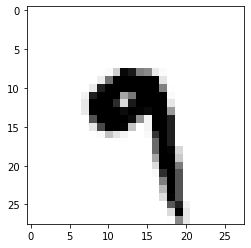

In [20]:
#visualization
r = random.randint(0, len(mnist_test) -1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28, 28),
          cmap = 'Greys', interpolation = 'nearest')
plt.show()